In [1]:
import pandas as pd

### Данные по пользователям

user_info = pd.read_sql(
    """SELECT * FROM public.user_data""",
    
    con="postgresql://your_database"
        "postgres.lab.your_database"
)

user_info.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [2]:
### Посты и топики

posts_info = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    
    con="postgresql://your_database"
        "postgres.lab.your_database"
)

posts_info.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [3]:
### Попробуем забрать, скажем, 5 миллионов

feed_data = pd.read_sql(
    """SELECT * FROM public.feed_data LIMIT 5000000""",
    
    con="postgresql://your_database"
        "postgres.lab.your_database"
)

feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-12-04 07:12:31,1953,815,like,0
1,2021-12-04 07:12:33,1953,449,view,0
2,2021-12-04 07:13:42,1953,5297,view,0
3,2021-12-04 07:14:43,1953,4109,view,0
4,2021-12-04 07:16:00,1953,18,view,0


In [4]:
### Как устроена колонка target?

feed_data[feed_data.action!='view']

,timestamp,user_id,post_id,action,target
0,2021-12-04 07:12:31,1953,815,like,0
7,2021-12-04 07:20:08,1953,5876,like,0
20,2021-10-23 19:15:44,21383,1195,like,0
22,2021-10-23 19:15:55,21383,7278,like,0
27,2021-10-23 19:22:33,21383,1370,like,0
...,...,...,...,...,...
4999957,2021-10-28 19:57:04,8754,1101,like,0
4999969,2021-10-28 20:10:18,8754,5770,like,0
4999976,2021-11-10 08:46:29,8754,5282,like,0
4999983,2021-11-10 08:57:59,8754,1411,like,0


In [5]:
### Почистим данные от action != view

feed_data = feed_data[feed_data.action=='view']

feed_data.head()

,timestamp,user_id,post_id,action,target
1,2021-12-04 07:12:33,1953,449,view,0
2,2021-12-04 07:13:42,1953,5297,view,0
3,2021-12-04 07:14:43,1953,4109,view,0
4,2021-12-04 07:16:00,1953,18,view,0
5,2021-12-04 07:16:47,1953,4768,view,0


In [6]:
user_info

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [7]:
posts_info

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [8]:
!pip install nltk

You should consider upgrading via the 'c:\users\denis\onedrive\рабочий стол\start ml\тест\env\scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

wnl = WordNetLemmatizer()

def preprocessing(line, token=wnl):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    line = line.replace('\n\n', ' ').replace('\n', ' ')
    line = ' '.join([token.lemmatize(x) for x in line.split(' ')])
    return line


tfidf = TfidfVectorizer(
    stop_words='english',
    preprocessor=preprocessing
)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\denis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
tfidf_data = (
    tfidf
    .fit_transform(posts_info['text'])
    .toarray()
)

tfidf_data

C:\Users\denis\OneDrive\Рабочий стол\Start ML\Тест\env\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'wa'] not in stop_words.
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13273932, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05061394, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
tfidf_data = pd.DataFrame(
    tfidf_data,
    index=posts_info.post_id,
    columns=tfidf.get_feature_names_out()
)

tfidf_data

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,𝓫𝓮,𝓫𝓮𝓽𝓽𝓮𝓻,𝓬𝓸𝓾𝓻𝓽𝓼,𝓱𝓮𝓪𝓻𝓲𝓷𝓰,𝓶𝓪𝔂,𝓹𝓱𝔂𝓼𝓲𝓬𝓪𝓵,𝓼𝓸𝓸𝓷𝓮𝓻,𝓼𝓾𝓫𝓸𝓻𝓭𝓲𝓷𝓪𝓽𝓮,𝓽𝓱𝓮,𝓽𝓸
post_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.132739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.050614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7316,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
posts_info['TotalTfIdf'] = tfidf_data.sum(axis=1).reset_index()[0]
posts_info['MaxTfIdf'] = tfidf_data.max(axis=1).reset_index()[0]
posts_info['MeanTfIdf'] = tfidf_data.mean(axis=1).reset_index()[0]

posts_info.head()

,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf
0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258
2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000275
3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138


In [13]:
[f"DistanceTo{ith}thCluster" for ith in range(1, 16)]

['DistanceTo1thCluster',
 'DistanceTo2thCluster',
 'DistanceTo3thCluster',
 'DistanceTo4thCluster',
 'DistanceTo5thCluster',
 'DistanceTo6thCluster',
 'DistanceTo7thCluster',
 'DistanceTo8thCluster',
 'DistanceTo9thCluster',
 'DistanceTo10thCluster',
 'DistanceTo11thCluster',
 'DistanceTo12thCluster',
 'DistanceTo13thCluster',
 'DistanceTo14thCluster',
 'DistanceTo15thCluster']

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

centered = tfidf_data - tfidf_data.mean()

pca = PCA(n_components=20)
pca_decomp = pca.fit_transform(centered)

kmeans = KMeans(n_clusters=15, random_state=0).fit(pca_decomp)

posts_info['TextCluster'] = kmeans.labels_

dists_columns = [
     'DistanceTo1thCluster',
     'DistanceTo2thCluster',
     'DistanceTo3thCluster',
     'DistanceTo4thCluster',
     'DistanceTo5thCluster',
     'DistanceTo6thCluster',
     'DistanceTo7thCluster',
     'DistanceTo8thCluster',
     'DistanceTo9thCluster',
     'DistanceTo10thCluster',
     'DistanceTo11thCluster',
     'DistanceTo12thCluster',
     'DistanceTo13thCluster',
     'DistanceTo14thCluster',
     'DistanceTo15thCluster',
]

dists_df = pd.DataFrame(
    data=kmeans.transform(pca_decomp),
    columns=dists_columns
)

dists_df.head()

,DistanceTo1thCluster,DistanceTo2thCluster,DistanceTo3thCluster,DistanceTo4thCluster,DistanceTo5thCluster,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,0.535453,0.542202,0.452062,0.584425,0.470107,0.458068,0.145641,0.441408,0.443449,0.508951,0.387805,0.495398,0.483341,0.688902,0.433672
1,0.430602,0.442063,0.308486,0.341875,0.338736,0.296020,0.261094,0.288211,0.299237,0.381670,0.184819,0.366052,0.344949,0.560285,0.163742
2,0.449854,0.474777,0.334107,0.539258,0.349228,0.347287,0.134058,0.312667,0.331962,0.397299,0.221118,0.389921,0.367127,0.513207,0.339858
3,0.416629,0.437962,0.275842,0.497816,0.309858,0.289786,0.232459,0.260141,0.294853,0.361065,0.149166,0.327468,0.326590,0.422568,0.270799
4,0.405722,0.394556,0.196182,0.464290,0.248455,0.244165,0.293078,0.169477,0.224542,0.303396,0.069790,0.286878,0.264367,0.493880,0.222432


In [15]:
posts_info = pd.concat((posts_info, dists_df), axis=1)

posts_info.head()

,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,DistanceTo2thCluster,DistanceTo3thCluster,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190,6,0.535453,0.542202,0.452062,...,0.458068,0.145641,0.441408,0.443449,0.508951,0.387805,0.495398,0.483341,0.688902,0.433672
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258,14,0.430602,0.442063,0.308486,...,0.296020,0.261094,0.288211,0.299237,0.381670,0.184819,0.366052,0.344949,0.560285,0.163742
2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000275,6,0.449854,0.474777,0.334107,...,0.347287,0.134058,0.312667,0.331962,0.397299,0.221118,0.389921,0.367127,0.513207,0.339858
3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144,10,0.416629,0.437962,0.275842,...,0.289786,0.232459,0.260141,0.294853,0.361065,0.149166,0.327468,0.326590,0.422568,0.270799
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138,10,0.405722,0.394556,0.196182,...,0.244165,0.293078,0.169477,0.224542,0.303396,0.069790,0.286878,0.264367,0.493880,0.222432


In [16]:
df = pd.merge(feed_data,
             posts_info,
             on='post_id',
             how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,2021-12-04 07:12:33,1953,449,view,0,UK young top Euro earnings league\n\nBritish c...,business,7.820445,0.476124,0.000170,...,0.248755,0.243544,0.182741,0.225043,0.313672,0.115732,0.307429,0.268253,0.560746,0.179613
1,2021-12-04 07:13:42,1953,5297,view,0,I was watching the sci-fi channel when this st...,movie,5.601328,0.568047,0.000122,...,0.347461,0.376635,0.194294,0.299222,0.150460,0.254422,0.337377,0.276673,0.602503,0.314218
2,2021-12-04 07:14:43,1953,4109,view,0,A discussion about social distancing and the c...,covid,3.225796,0.435409,0.000070,...,0.344122,0.381905,0.230618,0.297521,0.346282,0.250537,0.244764,0.310486,0.594892,0.317427
3,2021-12-04 07:16:00,1953,18,view,0,Parmalat founder offers apology\n\nThe founder...,business,9.546308,0.491587,0.000207,...,0.288230,0.301705,0.254685,0.283642,0.357791,0.160965,0.353348,0.322589,0.435238,0.250939
4,2021-12-04 07:16:47,1953,4768,view,0,Oh If any day u wanna see a supernatural thril...,movie,10.255728,0.320550,0.000223,...,0.330852,0.376871,0.126238,0.273718,0.229681,0.224218,0.326878,0.109456,0.595567,0.307138


In [17]:
df = pd.merge(df,
             user_info,
             on='user_id',
             how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster,gender,age,country,city,exp_group,os,source
0,2021-12-04 07:12:33,1953,449,view,0,UK young top Euro earnings league\n\nBritish c...,business,7.820445,0.476124,0.000170,...,0.268253,0.560746,0.179613,0,32,Russia,Smolensk,0,Android,ads
1,2021-12-04 07:13:42,1953,5297,view,0,I was watching the sci-fi channel when this st...,movie,5.601328,0.568047,0.000122,...,0.276673,0.602503,0.314218,0,32,Russia,Smolensk,0,Android,ads
2,2021-12-04 07:14:43,1953,4109,view,0,A discussion about social distancing and the c...,covid,3.225796,0.435409,0.000070,...,0.310486,0.594892,0.317427,0,32,Russia,Smolensk,0,Android,ads
3,2021-12-04 07:16:00,1953,18,view,0,Parmalat founder offers apology\n\nThe founder...,business,9.546308,0.491587,0.000207,...,0.322589,0.435238,0.250939,0,32,Russia,Smolensk,0,Android,ads
4,2021-12-04 07:16:47,1953,4768,view,0,Oh If any day u wanna see a supernatural thril...,movie,10.255728,0.320550,0.000223,...,0.109456,0.595567,0.307138,0,32,Russia,Smolensk,0,Android,ads


In [18]:
df['hour'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.hour)
df['month'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.month)

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo15thCluster,gender,age,country,city,exp_group,os,source,hour,month
0,2021-12-04 07:12:33,1953,449,view,0,UK young top Euro earnings league\n\nBritish c...,business,7.820445,0.476124,0.000170,...,0.179613,0,32,Russia,Smolensk,0,Android,ads,7,12
1,2021-12-04 07:13:42,1953,5297,view,0,I was watching the sci-fi channel when this st...,movie,5.601328,0.568047,0.000122,...,0.314218,0,32,Russia,Smolensk,0,Android,ads,7,12
2,2021-12-04 07:14:43,1953,4109,view,0,A discussion about social distancing and the c...,covid,3.225796,0.435409,0.000070,...,0.317427,0,32,Russia,Smolensk,0,Android,ads,7,12
3,2021-12-04 07:16:00,1953,18,view,0,Parmalat founder offers apology\n\nThe founder...,business,9.546308,0.491587,0.000207,...,0.250939,0,32,Russia,Smolensk,0,Android,ads,7,12
4,2021-12-04 07:16:47,1953,4768,view,0,Oh If any day u wanna see a supernatural thril...,movie,10.255728,0.320550,0.000223,...,0.307138,0,32,Russia,Smolensk,0,Android,ads,7,12


In [19]:
df = df.drop(
    [
        'action',
        'text',
    ], axis=1
)

df = df.set_index(['user_id', 'post_id'])

df.head(50)

timestamp  target          topic  TotalTfIdf  \
user_id post_id                                                          
1953    449     2021-12-04 07:12:33       0       business    7.820445   
        5297    2021-12-04 07:13:42       0          movie    5.601328   
        4109    2021-12-04 07:14:43       0          covid    3.225796   
        18      2021-12-04 07:16:00       0       business    9.546308   
        4768    2021-12-04 07:16:47       0          movie   10.255728   
        5876    2021-12-04 07:18:49       1          movie    6.926643   
        1350    2021-12-04 07:20:10       0       politics    6.150186   
        3325    2021-12-04 07:22:17       0          covid    3.399733   
        2011    2021-12-04 07:24:19       0           tech    6.561023   
        557     2021-12-04 07:25:33       0  entertainment    8.133901   
        1892    2021-12-04 07:27:31       0          sport    8.007078   
        1730    2021-12-04 07:29:46       0          sport    7.863042   
        2103    2021-12-04 07:31:58       0           tech    6.561023   
        1715    2021-12-04 07:34:49       0          sport    7.180867   
        10      2021-12-04 07:37:17       0       business    7.621504   
        1278    2021-12-04 07:39:20       0       politics    8.854459   
        1784    2021-12-04 07:39:42       0          sport    8.525347   
        4986    2021-12-05 08:26:44       0          movie    7.472874   
21383   7278    2021-10-23 19:15:46       1          movie    5.789996   
        1189    2021-10-23 19:15:57       0       politics   12.165738   
        1266    2021-10-23 19:17:31       0       politics    8.696087   
        2376    2021-10-23 19:20:10       0          covid    3.606626   
        1370    2021-10-23 19:21:20       1       politics    8.521258   
        2314    2021-10-23 19:22:35       0           tech    6.220879   
        4575    2021-10-23 19:25:34       0          movie    9.619563   
        2369    2021-10-23 19:26:26       1          covid    3.993117   
        7121    2021-10-23 19:26:47       0          movie    8.313237   
        6065    2021-10-23 19:27:11       0          movie    9.759793   
        2546    2021-10-23 19:28:54       0          covid    2.786009   
        6613    2021-10-23 19:30:12       0          movie    7.043202   
        5699    2021-10-23 19:31:51       0          movie    8.212731   
        4698    2021-10-23 19:33:31       0          movie    8.923698   
        5848    2021-10-23 19:35:17       0          movie    4.878699   
        670     2021-10-23 19:35:48       0  entertainment    8.789028   
        1353    2021-10-26 14:44:31       1       politics    6.994911   
        5622    2021-10-26 14:44:41       0          movie    6.440410   
        1884    2021-10-26 14:45:03       0          sport   13.671736   
        237     2021-10-26 14:45:33       0       business    7.209944   
        2427    2021-10-26 14:45:57       0          covid    3.328976   
        1358    2021-10-26 14:47:56       1       politics    7.560735   
        967     2021-10-26 14:48:31       0       politics    7.696906   
        5653    2021-10-26 14:51:06       0          movie    6.238604   
        2706    2021-10-26 14:52:57       0          covid    2.934866   
        1366    2021-10-26 14:53:21       0       politics    9.737213   
        4368    2021-10-26 14:54:20       0          movie    6.207304   
        4432    2021-10-26 14:56:25       0          movie    5.240073   
        2960    2021-10-26 14:57:06       0          covid    3.000573   
        3940    2021-10-26 14:58:45       0          covid    3.222439   
        6123    2021-10-26 15:01:07       1          movie    5.234281   
        6538    2021-10-26 15:01:21       0          movie    6.744691   

                 MaxTfIdf  MeanTfIdf  TextCluster  DistanceTo1thCluster  \
user_id post_id                                                           
1953    449      0.476124  

In [20]:
max(df.timestamp), min(df.timestamp)
df

timestamp  target          topic  TotalTfIdf  \
user_id post_id                                                          
1953    449     2021-12-04 07:12:33       0       business    7.820445   
        5297    2021-12-04 07:13:42       0          movie    5.601328   
        4109    2021-12-04 07:14:43       0          covid    3.225796   
        18      2021-12-04 07:16:00       0       business    9.546308   
        4768    2021-12-04 07:16:47       0          movie   10.255728   
...                             ...     ...            ...         ...   
8754    18      2021-11-10 09:14:20       0       business    9.546308   
        5666    2021-11-10 09:15:50       0          movie    6.054604   
        643     2021-11-10 09:18:41       0  entertainment    8.513538   
        2344    2021-11-10 09:20:03       0          covid    2.928170   
        2195    2021-11-10 09:20:20       0           tech    8.461666   

                 MaxTfIdf  MeanTfIdf  TextCluster  DistanceTo1thCluster  \
user_id post_id                                                           
1953    449      0.476124   0.000170           10              0.367986   
        5297     0.568047   0.000122            9              0.475085   
        4109     0.435409   0.000070            2              0.463487   
        18       0.491587   0.000207           10              0.440195   
        4768     0.320550   0.000223           12              0.455155   
...                   ...        ...          ...                   ...   
8754    18       0.491587   0.000207           10              0.440195   
        5666     0.518767   0.000132            4              0.442662   
        643      0.510278   0.000185            1              0.474506   
        2344     0.471984   0.000064            2              0.488246   
        2195     0.419507   0.000184            5              0.462195   

                 DistanceTo2thCluster  DistanceTo3thCluster  ...  \
user_id post_id                                              ...   
1953    449                  0.389398              0.227212  ...   
        5297                 0.422824              0.257589  ...   
        4109                 0.434129              0.071813  ...   
        18                   0.436420              0.283357  ...   
        4768                 0.361682              0.248633  ...   
...                               ...                   ...  ...   
8754    18                   0.436420              0.283357  ...   
        5666                 0.410250              0.261193  ...   
        643                  0.221461              0.308662  ...   
        2344                 0.447495              0.114768  ...   
        2195                 0.485017              0.342917  ...   

                 DistanceTo15thCluster  gender  age  country  \
user_id post_id                                                
1953    449                   0.179613       0   32   Russia   
        5297                  0.314218       0   32   Russia   
        4109                  0.317427       0   32   Russia   
        18                    0.250939       0   32   Russia   
        4768                  0.307138       0   32   Russia   
...                                ...     ...  ...      ...   
8754    18                    0.250939       1   19   Russia   
        5666                  0.306838       1   19   Russia   
        643                   0.310614       1   19   Russia   
        2344                  0.350368       1   19   Russia   
        2195                  0.338832       1   19   Russia   

                             city  exp_group       os  source  hour  month  
user_id post_id                                                             
1953    449              Smolensk          0  Android     ads     7     12  
        5297             Smolensk          0  Android     ads     7     12  
        4109             Smolensk          0  Android     ads

In [21]:
df_train = df[df.timestamp < '2021-12-15']
df_test = df[df.timestamp >= '2021-12-15']

df_train = df_train.drop('timestamp', axis=1)
df_test = df_test.drop('timestamp', axis=1)

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

y_train = df_train['target']
y_test = df_test['target']

y_train.shape, y_test.shape

((3728083,), (736652,))

In [23]:
X_train.head()

topic  TotalTfIdf  MaxTfIdf  MeanTfIdf  TextCluster  \
user_id post_id                                                           
1953    449      business    7.820445  0.476124   0.000170           10   
        5297        movie    5.601328  0.568047   0.000122            9   
        4109        covid    3.225796  0.435409   0.000070            2   
        18       business    9.546308  0.491587   0.000207           10   
        4768        movie   10.255728  0.320550   0.000223           12   

                 DistanceTo1thCluster  DistanceTo2thCluster  \
user_id post_id                                               
1953    449                  0.367986              0.389398   
        5297                 0.475085              0.422824   
        4109                 0.463487              0.434129   
        18                   0.440195              0.436420   
        4768                 0.455155              0.361682   

                 DistanceTo3thCluster  DistanceTo4thCluster  \
user_id post_id                                               
1953    449                  0.227212              0.456125   
        5297                 0.257589              0.516425   
        4109                 0.071813              0.521428   
        18                   0.283357              0.467798   
        4768                 0.248633              0.508163   

                 DistanceTo5thCluster  ...  DistanceTo15thCluster  gender  \
user_id post_id                        ...                                  
1953    449                  0.260824  ...               0.179613       0   
        5297                 0.183886  ...               0.314218       0   
        4109                 0.296590  ...               0.317427       0   
        18                   0.293090  ...               0.250939       0   
        4768                 0.161562  ...               0.307138       0   

                 age  country      city  exp_group       os  source  hour  \
user_id post_id                                                             
1953    449       32   Russia  Smolensk          0  Android     ads     7   
        5297      32   Russia  Smolensk          0  Android     ads     7   
        4109      32   Russia  Smolensk          0  Android     ads     7   
        18        32   Russia  Smolensk          0  Android     ads     7   
        4768      32   Russia  Smolensk          0  Android     ads     7   

                 month  
user_id post_id         
1953    449         12  
        5297        12  
        4109        12  
        18          12  
        4768        12  

[5 rows x 29 columns]

In [24]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

object_cols = [
    'topic', 'TextCluster', 'gender', 'country',
    'city', 'exp_group', 'hour', 'month',
    'os', 'source'
]

cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]

t = [
    ('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
    ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx)
]

col_transform = ColumnTransformer(transformers=t)

pipe_dt = Pipeline([
    ('column_transformer', col_transform),
    ('decision_tree', DecisionTreeClassifier())
])

pipe_dt.fit(X_train, y_train)

C:\Users\denis\OneDrive\Рабочий стол\Start ML\Тест\env\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\denis\OneDrive\Рабочий стол\Start ML\Тест\env\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\denis\OneDrive\Рабочий стол\Start ML\Тест\env\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [20, 28, 25, 26]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 4, 22, 23, 24, 27])])),
                ('decision_tree', DecisionTreeClassifier())])

In [25]:
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, pipe_dt.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, pipe_dt.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.9107961122077866
Качество на тесте: 0.5354108959873176


In [27]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100,
                             learning_rate=1,
                             depth=2)

catboost.fit(X_train, y_train, object_cols)

0:	learn: 0.3587851	total: 2.14s	remaining: 3m 31s
1:	learn: 0.3508109	total: 3.89s	remaining: 3m 10s
2:	learn: 0.3488268	total: 5.3s	remaining: 2m 51s
3:	learn: 0.3480260	total: 7.03s	remaining: 2m 48s
4:	learn: 0.3473561	total: 8.78s	remaining: 2m 46s
5:	learn: 0.3470819	total: 10.1s	remaining: 2m 38s
6:	learn: 0.3466686	total: 11.3s	remaining: 2m 29s
7:	learn: 0.3466219	total: 12.3s	remaining: 2m 21s
8:	learn: 0.3464149	total: 13.5s	remaining: 2m 16s
9:	learn: 0.3463885	total: 14.7s	remaining: 2m 11s
10:	learn: 0.3457232	total: 15.8s	remaining: 2m 7s
11:	learn: 0.3456070	total: 17s	remaining: 2m 4s
12:	learn: 0.3454980	total: 18.3s	remaining: 2m 2s
13:	learn: 0.3454565	total: 19.9s	remaining: 2m 2s
14:	learn: 0.3454196	total: 21.6s	remaining: 2m 2s
15:	learn: 0.3453947	total: 23.2s	remaining: 2m 1s
16:	learn: 0.3450749	total: 24.9s	remaining: 2m 1s
17:	learn: 0.3450043	total: 26.7s	remaining: 2m 1s
18:	learn: 0.3448812	total: 28.4s	remaining: 2m 1s
19:	learn: 0.3446752	total: 30.1s	

In [28]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.667544103008355
Качество на тесте: 0.6487379382699529


In [30]:
!pip install seaborn

You should consider upgrading via the 'c:\users\denis\onedrive\рабочий стол\start ml\тест\env\scripts\python.exe -m pip install --upgrade pip' command.


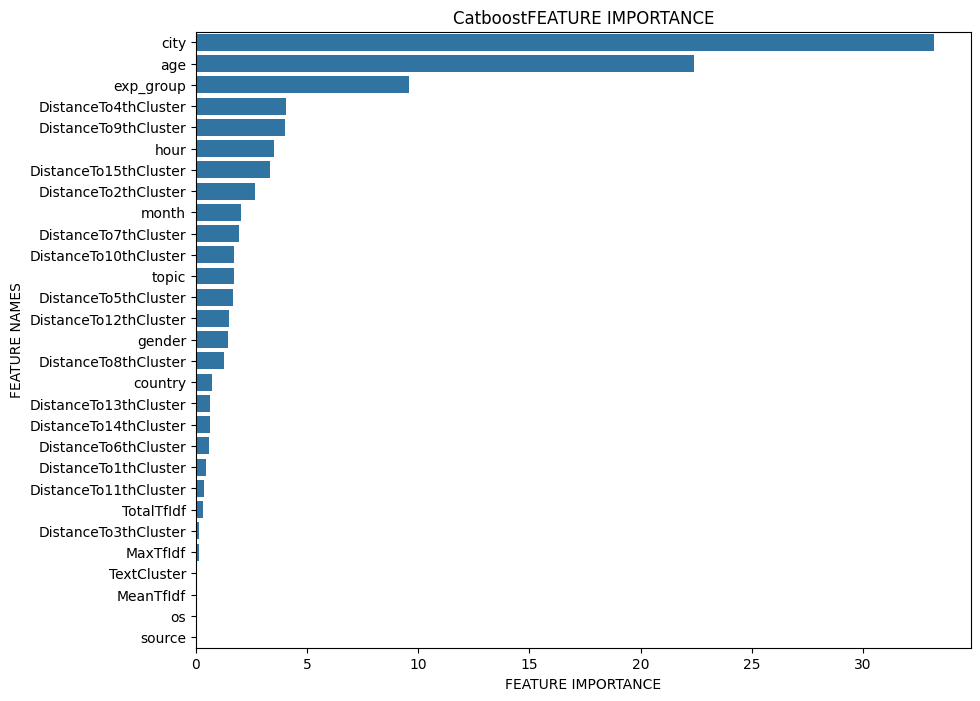

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost.feature_importances_,X_train.columns,'Catboost')

In [32]:
catboost.save_model(
    'catboost_model',
    format='cbm'
)

In [35]:
posts_info.to_sql(    
   "vpd_658_posts_info_features",                    
    con="postgresql://your_database"
        "postgres.lab.your_database"                      
    schema="public",                   
    if_exists='replace'            
   )                               

23

In [36]:
test_ = pd.read_sql(
    """SELECT * FROM public.vpd_658_posts_info_features""",
    
    con="postgresql://your_database"
        "postgres.lab.your_database"
)

test_

,index,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,DistanceTo2thCluster,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190,6,0.535453,0.542202,...,0.458068,0.145641,0.441408,0.443449,0.508951,0.387805,0.495398,0.483341,0.688902,0.433672
1,1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258,14,0.430602,0.442063,...,0.296020,0.261094,0.288211,0.299237,0.381670,0.184819,0.366052,0.344949,0.560285,0.163742
2,2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000275,6,0.449854,0.474777,...,0.347287,0.134058,0.312667,0.331962,0.397299,0.221118,0.389921,0.367127,0.513207,0.339858
3,3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144,10,0.416629,0.437962,...,0.289786,0.232459,0.260141,0.294853,0.361065,0.149166,0.327468,0.326590,0.422568,0.270799
4,4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138,10,0.405722,0.394556,...,0.244165,0.293078,0.169477,0.224542,0.303396,0.069790,0.286878,0.264367,0.493880,0.222432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7017,7314,Although the likeliness of someone focusing on...,movie,10.326422,0.300231,0.000224,9,0.594702,0.573913,...,0.507144,0.544909,0.393292,0.473999,0.250708,0.462644,0.531855,0.418813,0.697729,0.489884
7019,7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,6.703322,0.258411,0.000146,9,0.504927,0.488893,...,0.402205,0.443518,0.261536,0.351805,0.137199,0.339831,0.413699,0.321417,0.640029,0.381594
7020,7020,7317,I cant believe this film was allowed to be mad...,movie,5.628524,0.573061,0.000122,12,0.455859,0.395936,...,0.335483,0.386133,0.162087,0.284374,0.288477,0.245376,0.333050,0.065154,0.597015,0.318518
7021,7021,7318,The version I saw of this film was the Blockbu...,movie,6.883375,0.231244,0.000150,4,0.469741,0.358121,...,0.351463,0.390555,0.202778,0.300622,0.299040,0.268480,0.371061,0.178191,0.584818,0.324987
